In [2]:
import os
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import integrate

In [3]:
pi = np.pi
e = np.e

In [4]:
def f(x):
    return np.exp(x)

In [5]:
def g(x):
    return np.cos(np.cos(x))

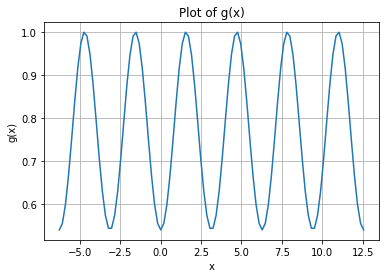

In [6]:
x = np.linspace(-2*pi,4*pi,100)
plt.grid()
plt.plot(x,g(x))
plt.title('Plot of g(x)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.show()

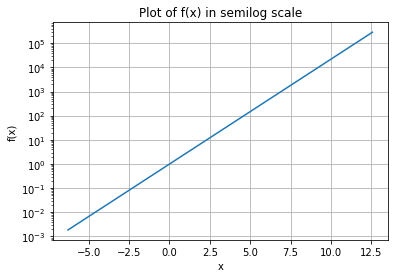

In [7]:
plt.grid()
plt.semilogy(x,f(x))
plt.title('Plot of f(x) in semilog scale')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

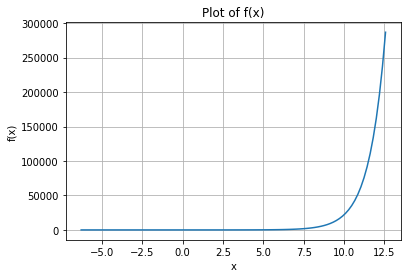

In [8]:
plt.grid()
plt.plot(x,f(x))
plt.title('Plot of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [9]:
def u(x,k):
    return f(x)*np.cos(k*x)
def v(x,k):
    return f(x)*np.sin(k*x)
def w(x,k):
    return g(x)*np.cos(k*x)
def z(x,k):
    return g(x)*np.sin(k*x)

In [10]:
fa = np.zeros(26,)
fb = np.zeros(25,)
ga = np.zeros(26,)
gb = np.zeros(25,)

In [11]:
for i in range(26):
    fa[i],_ = sp.integrate.quad(u,0,2*pi,(i,))
    ga[i],_ = sp.integrate.quad(w,0,2*pi,(i,))
for i in range(25):
    fb[i],_ = sp.integrate.quad(v,0,2*pi,(i+1,))
    gb[i],_ = sp.integrate.quad(z,0,2*pi,(i+1,)) 

In [12]:
fa /= pi
fb /= pi
ga /= pi
gb /= pi
fa[0] /= 2
ga[0] /= 2

In [13]:
# print(fa,fb,ga,gb)

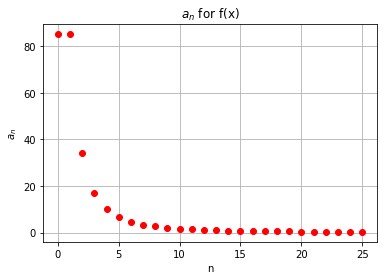

In [14]:
plt.grid()
plt.plot(np.arange(26),abs(fa),'o',color = 'r')
plt.title('$a_n$ for f(x)')
plt.xlabel('n')
plt.ylabel('$a_n$')
plt.show()

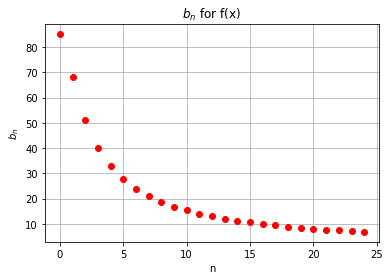

In [15]:
plt.grid()
plt.plot(np.arange(25),abs(fb),'o',color = 'r')
plt.title('$b_n$ for f(x)')
plt.xlabel('n')
plt.ylabel('$b_n$')
plt.show()

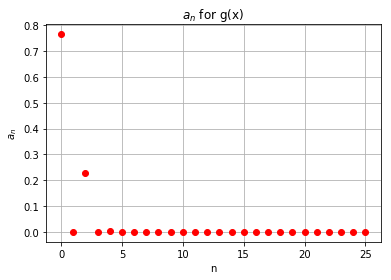

In [16]:
plt.grid()
plt.plot(abs(ga),'o',color = 'r')
plt.title('$a_n$ for g(x)')
plt.xlabel('n')
plt.ylabel('$a_n$')
plt.show()

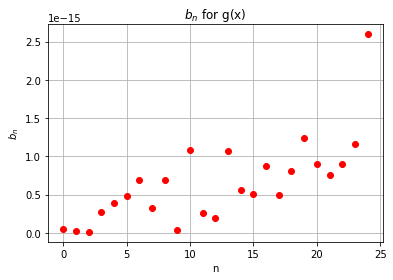

In [17]:
plt.grid()
plt.plot(np.arange(25),abs(gb),'o',color = 'r')
plt.title('$b_n$ for g(x)')
plt.xlabel('n')
plt.ylabel('$b_n$')
plt.show()

As g(x) = cos(cos(x)) is an even function all the odd components of the function is almost equal to zero.

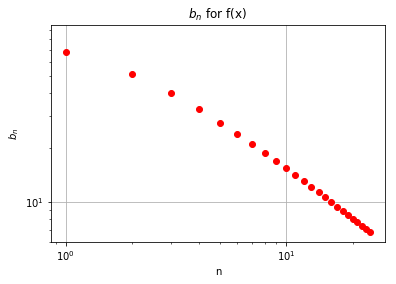

In [18]:
plt.grid()
plt.loglog(np.arange(25),abs(fb),'o',color = 'r')
plt.title('$b_n$ for f(x)')
plt.xlabel('n')
plt.ylabel('$b_n$')
plt.show()

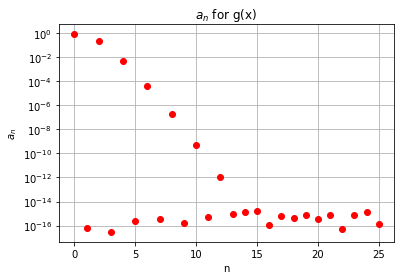

In [19]:
plt.grid()
plt.semilogy(np.arange(26),abs(ga),'o',color = 'r')
plt.title('$a_n$ for g(x)')
plt.xlabel('n')
plt.ylabel('$a_n$')
plt.show()

In [20]:
F = [None]*(len(fa)+len(fb))
F[0] = fa[0]
F[1::2] = fa[1:]
F[2::2] = fb
F = np.asarray(F)
# print(F)

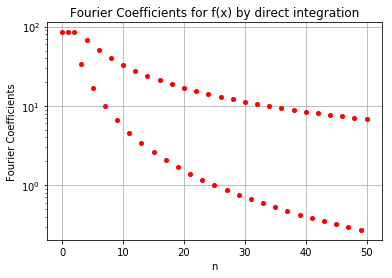

In [21]:
plt.grid()
plt.semilogy(abs(F),'o',color = 'r',markersize = 4)
plt.title('Fourier Coefficients for f(x) by direct integration')
plt.xlabel('n')
plt.ylabel('Fourier Coefficients') 
plt.show()

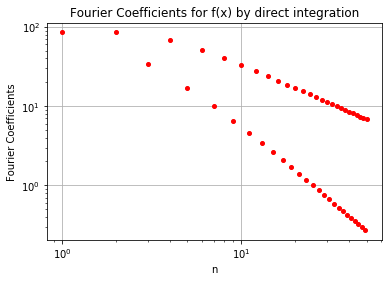

In [22]:
plt.grid()
plt.loglog(abs(F),'o',color = 'r',markersize = 4)
plt.title('Fourier Coefficients for f(x) by direct integration')
plt.xlabel('n')
plt.ylabel('Fourier Coefficients') 
plt.show()

In [23]:
G = [None]*(len(fa)+len(fb))
G[0] = ga[0]
G[1::2] = ga[1:]
G[2::2] = gb
G = np.asarray(G)
# print(G)

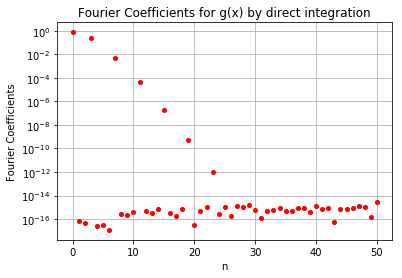

In [24]:
plt.grid()
plt.semilogy(abs(G),'o',color = 'r',markersize = 4)
plt.title('Fourier Coefficients for g(x) by direct integration')
plt.xlabel('n')
plt.ylabel('Fourier Coefficients') 
plt.show()

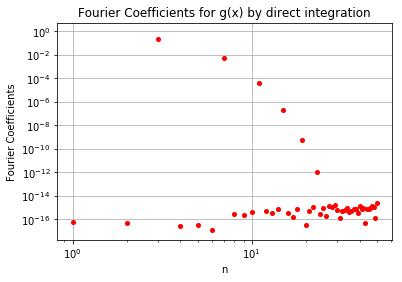

In [25]:
plt.grid()
plt.loglog(abs(G),'o',color = 'r',markersize = 4)
plt.title('Fourier Coefficients for g(x) by direct integration')
plt.xlabel('n')
plt.ylabel('Fourier Coefficients') 
plt.show()

In [26]:
X = np.linspace(0,2*pi,401)
X = X[:-1]
b1 = f(X)
b2 = g(X)
A = np.zeros((400,51))
A[:,0] = 1
for k in range(1,26):
    A[:,2*k-1] = np.cos(k*X)
    A[:,2*k] = np.sin(k*X)

c1 = np.linalg.lstsq(A,b1,rcond = -1)[0]
c2 = np.linalg.lstsq(A,b2,rcond = -1)[0]

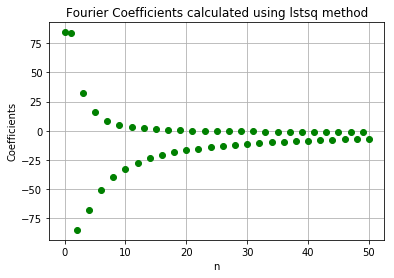

In [27]:
plt.grid()
plt.plot(c1,'o',color = 'g')
plt.title('Fourier Coefficients calculated using lstsq method')
plt.xlabel('n')
plt.ylabel('Coefficients')
plt.show()

In [28]:
# X = np.linspace(0,2*pi,401)
# X = X[:-1]
# b = g(X)
# A = np.zeros((400,51))
# A[:,0] = 1
# for k in range(1,26):
#     A[:,2*k-1] = np.cos(k*X)
#     A[:,2*k] = np.sin(k*X)

# c2 = np.linalg.lstsq(A,b,rcond = -1)[0]

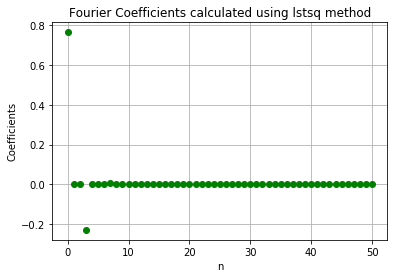

In [29]:
plt.grid()
plt.plot(c2,'o',color = 'g')
plt.title('Fourier Coefficients calculated using lstsq method')
plt.xlabel('n')
plt.ylabel('Coefficients')
plt.show()

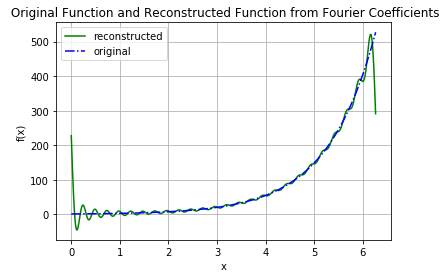

In [30]:
final_f = A.dot(c1)
plt.grid()
plt.plot(X,final_f,'-',color = 'g')
plt.plot(X,f(X),'-.',color = 'b')
plt.title(' Original Function and Reconstructed Function from Fourier Coefficients')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['reconstructed','original'])
plt.show()

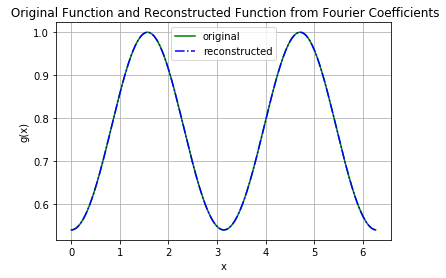

In [31]:
final_g = A.dot(c2)
plt.grid()
plt.plot(X,final_g,'-',color = 'g')
plt.plot(X,g(X),'-.',color = 'b')
plt.title(' Original Function and Reconstructed Function from Fourier Coefficients')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend(['original','reconstructed'])
plt.show()

In [32]:
print("Mean Error in f(x) = exp(x) is {}".format(np.mean(abs(c1 - F))))

Mean Error in f(x) = exp(x) is 0.6886830611301593


In [33]:
print("Mean Error in g(x) = cos(cos(x)) is {}".format(np.mean(abs(c2 - G))))

Mean Error in g(x) = cos(cos(x)) is 5.359481874213044e-16


In [34]:
print(np.argmax(abs(c2-G)))

50
